# Chinese Version TFIDF and WordCloud

### # Chinese Version TFIDF

In [98]:
import pandas as pd
import chardet
import pandas as pd
import numpy as np
import jieba as jb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import gensim
from gensim import corpora
import pyLDAvis


In [554]:
df = pd.read_csv('../data/Twitter/twitter.csv')
df.shape

(4252, 5)

In [555]:
#user_id	created_at	screen_name	text	JapanNuclearWater_tweet_df.location
df.rename(columns={'内容':'text'
                               }, inplace = True)
df.head()


,user_id,created_at,screen_name,text,location
0,9.160000e+17,18/4/2021 11:51,XGuoforWaterloo,@JohnOCAP Don't forget the #Fukushima #Nuclear...,"Kitchener, Ontario"
1,9.160000e+17,17/4/2021 11:49,XGuoforWaterloo,@rafaelmgrossi @iaeaorg The attitude of the US...,"Kitchener, Ontario"
2,1.463413e+09,18/4/2021 11:44,Aroguden,#SouthKorea raised concerns over #Japan's deci...,Barquisimeto-Venezuela
3,1.463413e+09,13/4/2021 11:32,Aroguden,#Japan will release more than a million tonnes...,Barquisimeto-Venezuela
4,1.463413e+09,14/4/2021 9:38,Aroguden,#SouthKorea aims to fight #Japan's #Fukushima ...,Barquisimeto-Venezuela


In [533]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    #compile(u"[^\u4E00-\u9FA5]")
    rule = re.compile("[^a-zA-Z0-9\u4E00-\u9FFF]")
    line = rule.sub('',line)
    return line
 
#停用词列表
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  
 
#加载停用词
stopwords = stopwordslist("../data/ChineseEnglishStopWords.txt")



In [534]:
#删除除汉字以外的所有符号
import re
df['clean_text'] = df['text'].apply(remove_punctuation)
 
#分词，并过滤停用词
df['cut_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df.head()


,博主,id,时间,来源,收藏,转发,评论,点赞,艾特,标签,text,clean_text,cut_text
0,2345落英缤纷,6.628711e+09,04月12日 22:59,OPPO智能手机,NaN,NaN,NaN,1.0,NaN,#日本核废水可致癌致畸致突变#,联合国呢？这么大的事都不发声的吗？我天虽然我不是医学生，但是切尔诺贝利纪录片看得我毛骨悚然，...,联合国呢这么大的事都不发声的吗我天虽然我不是医学生但是切尔诺贝利纪录片看得我毛骨悚然这个事情怎么办,联合国 事 发声 天 医学生 切尔诺贝利 纪录片 看得 毛骨悚然 事情
1,脸长也叫特长bai生,2.962594e+09,04月12日 22:59,OPPO R9s,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,"日本核废水一旦排入太平洋中危害有多大,以后海鲜还有人敢吃吗?“哥斯拉”会因此出现吗？ ￼mo...",日本核废水一旦排入太平洋中危害有多大以后海鲜还有人敢吃吗哥斯拉会因此出现吗moons正浓的微博视频,日本 核 废水 排入 太平洋 中 危害 海鲜 人敢 吃 哥斯拉 moons 正浓 视频
2,小桃红柳绿,2.149115e+09,04月12日 22:59,华为P8,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,【专家：】4月9日，日本政府基本决定将福岛核污水排入大海。12日，日本首相菅义伟表示，解决东...,专家4月9日日本政府基本决定将福岛核污水排入大海12日日本首相菅义伟表示解决东京电力公司福岛...,专家 月 日 日本政府 福岛 核 污水 排入 大海 12 日 日本首相 菅义伟 解决 东京 ...
3,苹果柠檬刮油汤,2.635392e+09,04月12日 22:59,Android客户端,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,今日日本首相菅义伟再次表示，福岛核污水排入大海已经不能推迟了德国的海洋科学研究机构的计算显示...,今日日本首相菅义伟再次表示福岛核污水排入大海已经不能推迟了德国的海洋科学研究机构的计算显示从...,今日 日本首相 菅义伟 福岛 核 污水 排入 大海 推迟 德国 海洋 科学研究 机构 计算 ...
4,陳毅YiChen,2.389546e+09,04月12日 22:59,小米5s 拍照黑科技,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,【专家：】4月9日，日本政府基本决定将福岛核污水排入大海。12日，日本首相菅义伟表示，解决东...,专家4月9日日本政府基本决定将福岛核污水排入大海12日日本首相菅义伟表示解决东京电力公司福岛...,专家 月 日 日本政府 福岛 核 污水 排入 大海 12 日 日本首相 菅义伟 解决 东京 ...


In [535]:
no_features = 1000
 
 
tfidf = TfidfVectorizer(max_features=no_features)
tfidf_features = tfidf.fit_transform(df.cut_text)
tfidf_feature_names = tfidf.get_feature_names()
 
 
cv = CountVectorizer(max_features=no_features)
cv_features = cv.fit_transform(df.cut_text)
cv_feature_names = cv.get_feature_names()


In [536]:
no_topics = 9
 
#NMF
nmf_tfidf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_features)
 
#LDA
lda_cv = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(cv_features)

In [537]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("主题 {} : {}".format(topic_idx,"|".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])))
 
no_top_words = 10
print('---------------NMF-tfidf_features 主题-----------------------------------------')
display_topics(nmf_tfidf, tfidf_feature_names, no_top_words)
print()
print('--------------Lda-CountVectorizer_features 主题--------------------------------')
display_topics(lda_cv, cv_feature_names, no_top_words)


---------------NMF-tfidf_features 主题-----------------------------------------
主题 0 : 国际|吴江|处置|中方|严正|交涉|日方|提出|不顾|福岛
主题 1 : 视频|新闻|央视|赵立坚|收起|参考|专家|11|回应|张熙
主题 2 : 日本|废水|太平洋|排放|排核|中国|美国|入海|真的|国家
主题 3 : 失望|深感|人权|视频|大海|联合国|排入|威胁|环境|日本政府
主题 4 : 美国|产品|日本|大米|鱼类|进口|作何解释|政策|不知|管理局
主题 5 : 计算结果|显示|研究|影响|机构|57|天内|大半|德国|扩散
主题 6 : 网页|链接|排海|关切|外交部|中方|废水|查看|此微博|作者
主题 7 : 同意|一段|报告|链接|建议|兴趣|实践|图四是|iaea4|关键词
主题 8 : 日方|国际|负责|公共利益|反对|意见|福岛|看着|视而不见|听而不闻

--------------Lda-CountVectorizer_features 主题--------------------------------
主题 0 : 日本|吴江|提出|严正|交涉|废水|机构|召见|产品|不顾
主题 1 : 任豪|视频|央视|粉丝|记者|申杨|总台|网页|链接|废水
主题 2 : 视频|大海|收起|排入|专家|废水|新闻|人权|失望|日本政府
主题 3 : 影响|环球|核污染|资讯|机构|研究|显示|计算结果|废水|美国
主题 4 : 废水|日本|排放|福岛|日本政府|海洋|入海|排海|核电站|收起
主题 5 : 日本|废水|中国|太平洋|排核|世界|排放|事件|视频|全世界
主题 6 : 废水|日本政府|日本|影响|全球|收起|入海|美国|危及|道破
主题 7 : 国际|日方|废水|外交部|中方|处置|福岛|核电站|排海|反对
主题 8 : 日本|废水|美国|真的|人类|收起|国家|海洋|历史|核废料


In [538]:
text_data = df.cut_text.apply(lambda x:x.split())
#过滤掉单个汉字的词语
text_data = text_data.apply(lambda x:[w for w in x if len(w)>1] )
 
dictionary = corpora.Dictionary(text_data)
 
#过滤掉词频小于5次,和词频大于90%的词语
dictionary.filter_extremes(no_below=5, no_above=0.9)

In [539]:
#计数的语料
corpus = [dictionary.doc2bow(text) for text in text_data]
 
#普通LDA模型
import gensim
no_topics = 9
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = no_topics, id2word=dictionary)
 
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print("主题 %d: " % (topic[0]))
    print(topic[1])
    print()

主题 0: 
0.054*"日本" + 0.048*"废水" + 0.044*"失望" + 0.028*"发表" + 0.019*"中国" + 0.017*"持续" + 0.016*"事件" + 0.016*"收起"

主题 1: 
0.033*"太平洋" + 0.030*"日本" + 0.028*"废水" + 0.027*"影响" + 0.026*"视频" + 0.023*"员工" + 0.023*"机构" + 0.022*"资讯"

主题 2: 
0.121*"视频" + 0.038*"收起" + 0.029*"央视" + 0.029*"产品" + 0.025*"百万吨" + 0.024*"日本" + 0.021*"赵立坚" + 0.021*"专家"

主题 3: 
0.036*"废水" + 0.032*"日本" + 0.024*"国际" + 0.023*"处置" + 0.021*"福岛" + 0.019*"事故" + 0.018*"人权" + 0.017*"环境"

主题 4: 
0.079*"日本" + 0.053*"废水" + 0.034*"视频" + 0.025*"进口" + 0.025*"美国" + 0.022*"链接" + 0.021*"网页" + 0.021*"日本政府"

主题 5: 
0.061*"废水" + 0.046*"日本" + 0.028*"麻生太郎" + 0.023*"视频" + 0.020*"中国" + 0.017*"排放" + 0.017*"太平洋" + 0.015*"大海"

主题 6: 
0.097*"日方" + 0.062*"国际" + 0.039*"废水" + 0.035*"下水道" + 0.028*"外交部" + 0.028*"日本" + 0.022*"视频" + 0.020*"处置"

主题 7: 
0.055*"废水" + 0.048*"日本" + 0.030*"日本政府" + 0.029*"排放" + 0.027*"福岛" + 0.023*"排入" + 0.020*"污染" + 0.020*"海洋"

主题 8: 
0.056*"任豪" + 0.043*"废水" + 0.034*"粉丝" + 0.033*"姚琛" + 0.032*"日本" + 0.019*"小号" + 0.018*"道歉" + 0.014*"视频"

In [540]:
#tf-idf语料
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
 
#多核并行lda模型
no_topics = 9
tf_idf_lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=no_topics, id2word=dictionary, passes=2, workers=4)
 
topics = tf_idf_lda_model.print_topics(num_words=8)
for topic in topics:
    print("主题 %d: " % (topic[0]))
    print(topic[1])
    print()

主题 0: 
0.023*"日本" + 0.014*"美国" + 0.014*"产品" + 0.012*"排核" + 0.009*"视频" + 0.008*"进口" + 0.008*"废水" + 0.008*"鱼类"

主题 1: 
0.019*"视频" + 0.010*"日本" + 0.010*"国际" + 0.008*"日方" + 0.008*"废水" + 0.007*"真的" + 0.006*"国家" + 0.006*"火旺"

主题 2: 
0.016*"链接" + 0.016*"网页" + 0.014*"显示" + 0.013*"计算结果" + 0.013*"研究" + 0.013*"外交部" + 0.013*"排海" + 0.012*"影响"

主题 3: 
0.025*"收起" + 0.020*"视频" + 0.011*"日本" + 0.011*"新闻" + 0.011*"央视" + 0.010*"废水" + 0.007*"海里" + 0.007*"太平洋"

主题 4: 
0.033*"新闻" + 0.029*"央视" + 0.028*"赵立坚" + 0.022*"视频" + 0.013*"废水" + 0.012*"日本" + 0.009*"日本政府" + 0.007*"收起"

主题 5: 
0.012*"视频" + 0.011*"专家" + 0.010*"参考" + 0.009*"失望" + 0.009*"深感" + 0.008*"人权" + 0.008*"日本" + 0.008*"废水"

主题 6: 
0.009*"视频" + 0.009*"日本" + 0.008*"废水" + 0.008*"大海" + 0.008*"海洋" + 0.008*"排放" + 0.008*"深感" + 0.008*"失望"

主题 7: 
0.017*"国际" + 0.011*"吴江" + 0.010*"排海" + 0.009*"日方" + 0.009*"废水" + 0.008*"中方" + 0.008*"福岛" + 0.008*"处置"

主题 8: 
0.020*"日方" + 0.013*"国际" + 0.012*"反对" + 0.012*"负责" + 0.009*"日本" + 0.009*"一倒" + 0.008*"公共利益" + 0.007*"废水"



In [246]:
# import numpy as np
# import pandas as pd
# submit1_path="../data/Twitter/twitter.csv"
# submit1=pd.read_csv(submit1_path)
# #submit1.drop('Target',axis=1,inplace=True)
# #submit1.Predicted=submit1.Predicted.apply(lambda x: "00"+str(int(x)+1))
# #submit1.Predicted=submit1.Predicted.apply(lambda x: str(int(x)))
# submit1.user_id=submit1.user_id.apply(lambda x: str(x))
# #submit1.Id=submit1.Id.apply(lambda x: str(x).zfill(6))
# submit1=submit1.sort_values('user_id',ascending=True)
# submit1.to_csv("../data/Twitter/twitter.txt",sep='\t',index=None,header=None)


In [ ]:
# f= open('../data/Twitter/twitter.txt')
# f = f.read()
# f = [f]
# f

### Word Cloud

In [541]:
#导入包
import pandas as pd                      #数据处理包
import numpy as np                       #数据处理包
from wordcloud import WordCloud          #绘制词云
import jieba                             #中文分词包
import jieba.posseg as pseg
import re                                #正则表达式，可用于匹配中文文本
import collections                       #计算词频


In [542]:
weibo = pd.read_csv('../data/Weibo/weibo.csv',low_memory=False)
df_question.head()
df = df_question['内容']
df.to_csv("../data/weiboText.csv",index=False,sep=',', encoding='utf-8')
weibo.head()

,博主,id,时间,来源,收藏,转发,评论,点赞,艾特,标签,内容
0,2345落英缤纷,6.628711e+09,04月12日 22:59,OPPO智能手机,NaN,NaN,NaN,1.0,NaN,#日本核废水可致癌致畸致突变#,联合国呢？这么大的事都不发声的吗？我天虽然我不是医学生，但是切尔诺贝利纪录片看得我毛骨悚然，...
1,脸长也叫特长bai生,2.962594e+09,04月12日 22:59,OPPO R9s,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,"日本核废水一旦排入太平洋中危害有多大,以后海鲜还有人敢吃吗?“哥斯拉”会因此出现吗？ ￼mo..."
2,小桃红柳绿,2.149115e+09,04月12日 22:59,华为P8,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,【专家：】4月9日，日本政府基本决定将福岛核污水排入大海。12日，日本首相菅义伟表示，解决东...
3,苹果柠檬刮油汤,2.635392e+09,04月12日 22:59,Android客户端,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,今日日本首相菅义伟再次表示，福岛核污水排入大海已经不能推迟了德国的海洋科学研究机构的计算显示...
4,陳毅YiChen,2.389546e+09,04月12日 22:59,小米5s 拍照黑科技,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,【专家：】4月9日，日本政府基本决定将福岛核污水排入大海。12日，日本首相菅义伟表示，解决东...


In [543]:

#  词云制作
#  两个都是第三方库
import jieba
import  wordcloud
#  打开文件（保存 弹幕的 csv 文件）
path = '../data/weiboText.csv'
f = open(path,encoding='utf-8')
txt = f.read()  #   读取
txt_list = jieba.lcut(txt)  #  处理  分词数据(返回数据类型列表)
#print(txt_list)   #  理解为分词处理 后的结果
# 接下来 理解为  将其这些内容 拼接为  完整的  字符串
string = ' '.join(txt_list)
# print(string)

#选取中文：使用正则表达式
filter_pattern = re.compile('[^\u4E00-\u9FD5]+')
chinese_only = filter_pattern.sub('', string)




In [544]:
#中文分词
words_list = pseg.cut(chinese_only)  

#删除停用词
stopwords1 = [line.rstrip() for line in open('../data/ChineseEnglishStopWords.txt', 'r', encoding='utf-8')]
stopwords = stopwords1 

meaninful_words = []
for word, flag in words_list:
    if word not in stopwords:
        meaninful_words.append(word)
        


In [545]:
#计算词频，一行解决
word_counts = collections.Counter(meaninful_words) # 对分词做词频统计
word_counts_top30 = word_counts.most_common(30) # 获取前30最高频的词
print (word_counts_top30) 


[('废水', 6106), ('日本', 5970), ('核', 5530), ('视频', 2081), ('福岛', 1893), ('收起', 1844), ('排放', 1625), ('国际', 1619), ('说', 1542), ('日方', 1287), ('日本政府', 1257), ('日', 1239), ('中国', 1205), ('美国', 1158), ('喝', 1090), ('核电站', 1082), ('海洋', 1007), ('太平洋', 1004), ('排海', 1001), ('入海', 735), ('处置', 711), ('国家', 703), ('外交部', 639), ('排入', 630), ('链接', 610), ('大海', 600), ('影响', 600), ('人类', 594), ('月', 587), ('专家', 568)]


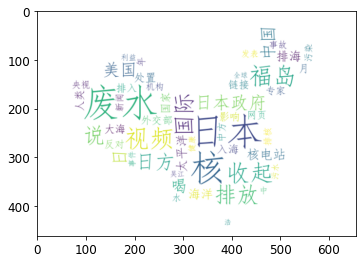

In [546]:
import matplotlib.pyplot as plt
from PIL import Image
china = np.array(Image.open('../figures/china_mask.png'))
wc = WordCloud(mask=china,background_color = "white",max_words = 300,font_path='../data/simfang.ttf',min_font_size = 15,max_font_size = 80,width = 120,height = 600)
wc.generate_from_frequencies(word_counts)
wc.to_file("WeiboText_Nuclear.png")
plt.figure()
plt.imshow(wc, interpolation="bilinear")


### 英文词云

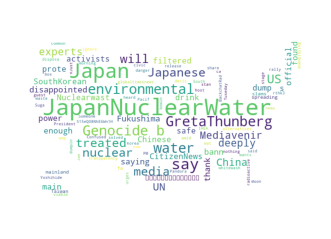

In [553]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

# twitter = np.array(Image.open('../figures/twitter_mask.png'))
china = np.array(Image.open('../figures/china_mask.png'))
england = np.array(Image.open('../figures/england_mask.png'))
india = np.array(Image.open('../figures/india_mask.png'))
japan = np.array(Image.open('../figures/japan_mask.png'))
USA = np.array(Image.open('../figures/USA_mask.png'))

#IndiaTwit JapanTwit USATwit
stopwords = set(STOPWORDS)
data = pd.read_csv("../data/RegionDataForWordCloudandSentiment/HongKongTwist.csv")

wordcloud = WordCloud(
                          mask=USA,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(data['text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("HKTwit.png", dpi=900)

### 情感分析

In [301]:
pip install snownlp

     |████████████████████████████████| 37.6 MB 1.2 MB/s eta 0:00:01
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760957 sha256=e35c212bb4d57e05c64117aec3bcb4e86bf27b06fde697b210121fed3410e840
  Stored in directory: /Users/sing/Library/Caches/pip/wheels/09/14/c5/ea9aee34229caa97c6f6ff78c82c7f2b1a3423c1f37227b6a6
Successfully built snownlp
Note: you may need to restart the kernel to use updated packages.


In [556]:
df = pd.read_csv('../data/Weibo/weibo.csv')
df.to_csv("../data/Weibo/weibo.csv",index=False,sep=',', encoding='utf-8')
df = pd.read_csv('../data/Weibo/weibo.csv')
df.head()


,博主,id,时间,来源,收藏,转发,评论,点赞,艾特,标签,内容
0,2345落英缤纷,6.628711e+09,04月12日 22:59,OPPO智能手机,NaN,NaN,NaN,1.0,NaN,#日本核废水可致癌致畸致突变#,联合国呢？这么大的事都不发声的吗？我天虽然我不是医学生，但是切尔诺贝利纪录片看得我毛骨悚然，...
1,脸长也叫特长bai生,2.962594e+09,04月12日 22:59,OPPO R9s,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,"日本核废水一旦排入太平洋中危害有多大,以后海鲜还有人敢吃吗?“哥斯拉”会因此出现吗？ ￼mo..."
2,小桃红柳绿,2.149115e+09,04月12日 22:59,华为P8,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,【专家：】4月9日，日本政府基本决定将福岛核污水排入大海。12日，日本首相菅义伟表示，解决东...
3,苹果柠檬刮油汤,2.635392e+09,04月12日 22:59,Android客户端,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,今日日本首相菅义伟再次表示，福岛核污水排入大海已经不能推迟了德国的海洋科学研究机构的计算显示...
4,陳毅YiChen,2.389546e+09,04月12日 22:59,小米5s 拍照黑科技,NaN,NaN,NaN,NaN,NaN,#日本核废水可致癌致畸致突变#,【专家：】4月9日，日本政府基本决定将福岛核污水排入大海。12日，日本首相菅义伟表示，解决东...


In [530]:

# Weibo = df.loc[0:4525] 
# # df1.drop(columns=["内容"], inplace = True)
# # df1.rename(columns={'博主,id,时间,来源,收藏,转发,评论,点赞,艾特,标签,内容\r':'内容'
# #                                }, inplace = True)
# # Weibo = pd.concat([df1,df2])
# Weibo.shape
# Weibo.drop(columns=['博主,id,时间,来源,收藏,转发,评论,点赞,艾特,标签,内容\r'], inplace = True)
# Weibo.to_csv("../data/Weibo/weibo.csv",index=False,sep=',', encoding='utf-8')

In [ ]:
from snownlp import SnowNLP
import codecs
import os

In [557]:
WeiboText = []
for index,row in df.iterrows():
    df1 = df['内容'].tolist()[index]
    WeiboText.append(df1)

In [558]:
# f = open('WeiboText.txt', 'w')
# print(WeiboText , file = f)
# f.close()
# source = pd.read_csv('../data/Weibo/weibo.csv',low_memory=False)
line = WeiboText


### 每条微博的情感分析

0.8582180435048952


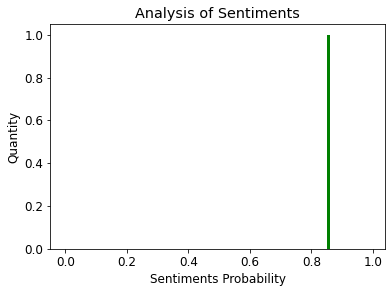

<Figure size 432x288 with 0 Axes>

In [585]:
source = open("WeiboText.txt","r", encoding='utf-8')
line = source.readlines()

sentimentslist = []
for i in line:
    s = SnowNLP(i)
    print(s.sentiments)
    sentimentslist.append(s.sentiments)

import matplotlib.pyplot as plt
import numpy as np
plt.hist(sentimentslist, bins = np.arange(0, 1, 0.01), facecolor = 'g')
plt.xlabel('Sentiments Probability')
plt.ylabel('Quantity')
plt.title('Analysis of Sentiments')
plt.show()
plt.savefig("WeiboSentiment.png")